In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import least_squares
from scipy import *
import scipy.integrate as integrate
import emcee
import corner

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
text_size = 20

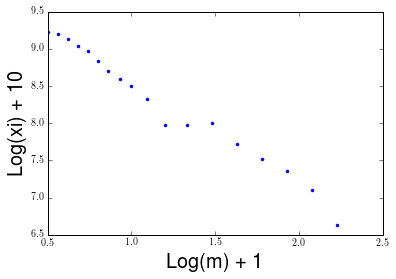

In [163]:
#log_xi is log(xi)+10
log_xi = np.array([6.63, 7.10, 7.36, 7.52, 7.72, 8.00, 7.98, 7.98, 8.32, 8.50, 8.60, 8.70, 
                  8.83, 8.97, 9.04, 9.13, 9.20, 9.22])
#log_m is log(M/M_sun)+1
log_m = np.array([2.23, 2.08, 1.93, 1.78, 1.63, 1.48, 1.33, 1.20, 1.09, 1.00, 0.93, 0.86,
                  0.80, 0.74, 0.68, 0.62, 0.56, 0.50])
plt.figure(1)
plt.plot(log_m, log_xi, '.')
plt.xlabel(r'Log(m) + 1', fontsize = text_size)
plt.ylabel(r'Log(xi) + 10', fontsize = text_size)
plt.show()

## Part (a)

 active_mask: array([0, 0])
        cost: 0.00042674192518434234
         fun: array([ 0.00024352, -0.00016934, -0.0005192 , -0.00043059, -0.00056402,
       -0.00238374,  0.0028341 ,  0.00932272,  0.00606295,  0.00446217,
        0.00546327,  0.00668429,  0.00138699, -0.00952091, -0.0078554 ,
       -0.01125502, -0.00830955,  0.01645585])
        grad: array([ -2.02576012e-11,   4.67042452e-09])
         jac: array([[  1.85701688e-02,  -1.89785362e-03],
       [  3.01950581e-02,  -2.70957623e-03],
       [  4.90971053e-02,  -3.79385375e-03],
       [  7.98317971e-02,  -5.17383122e-03],
       [  1.29806346e-01,  -6.79482416e-03],
       [  2.11064864e-01,  -8.41780630e-03],
       [  3.43191055e-01,  -9.41004388e-03],
       [  5.23005966e-01,  -8.69117284e-03],
       [  7.47012707e-01,  -5.58614555e-03],
       [  1.00000000e+00,   0.00000000e+00],
       [  1.25465024e+00,   7.29730442e-03],
       [  1.57414723e+00,   1.83111295e-02],
       [  1.91202408e+00,   3.17735033e-02],
 

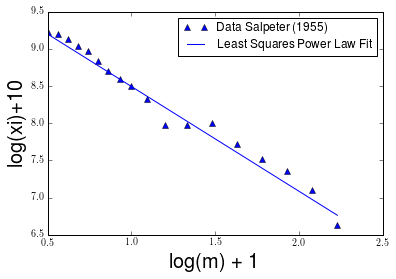

In [192]:
#define the salpeter power law and the residual function for the least squares analysis
def salpeter(x, log_m):
    return x[0] * (10**(log_m-1))**(-x[1])
def fun(x, log_m, log_xi):
    return salpeter(x, log_m) - (10**(log_xi-10))
x0 = [1, 1]
ans = least_squares(fun, x0, jac = '3-point', args = (log_m, log_xi), bounds = (0,10))
print ans
#got a slope of -1.4074 and an intercept of 0.036 for the least squares fit

#plot least squares fit
least_sq_fit = []
for i in log_m:
    val = 9.9+(i*-1.407)
    least_sq_fit.append(val)
    
plt.figure(2)
plt.plot(log_m, log_xi, "b^", label = 'Data Salpeter (1955)')
plt.plot(log_m, fit, color = 'blue', label = 'Least Squares Power Law Fit')
plt.xlabel(r'log(m) + 1', fontsize = text_size)
plt.ylabel(r'log(xi)+10', fontsize = text_size)
plt.legend()
plt.savefig('least_squares_fit_prob_3.png',dpi = 300)
plt.show()

In [198]:
N = 1000
def ln_prob(theta, log_m, log_xi):
    a, c= theta 
    model = c*(10**(log_m-1))^(-a)
    return -np.sum(((10**(log_xi-10)) - model))

ndim, nwalkers = 2, 100
pos = [np.random.rand(ndim) for i in range(nwalkers)] 
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(log_m, log_xi))
sampler.run_mcmc(pos, N)

(array([[  1.0381108 ,   9.27798769],
        [  0.96830013,   9.44165494],
        [  1.99972073,  10.43784755],
        [  1.30271269,  10.04664928],
        [  1.71979844,  10.43167346],
        [  1.43021113,  10.17488115],
        [  2.35521438,  11.23650642],
        [  1.39640988,  10.03820751],
        [  1.474502  ,   9.98031525],
        [  0.87095728,   9.35295055],
        [  1.75169499,  10.49559178],
        [  1.53725575,  10.1420723 ],
        [  0.75734087,   9.15685348],
        [  1.30838524,   9.86638388],
        [  1.73937519,  10.36373164],
        [  1.39347533,  10.04579592],
        [  0.85479282,   9.13533979],
        [  1.07913618,   9.47225752],
        [  1.24625601,   9.84447251],
        [  1.32716452,   9.89967958],
        [  1.45991137,  10.13144597],
        [  1.94751561,  10.74871131],
        [  1.46786883,  10.09221456],
        [  1.78439133,  10.43997578],
        [  2.36116692,  11.20672586],
        [  1.32901913,   9.73907865],
        [  2

## Part (b)

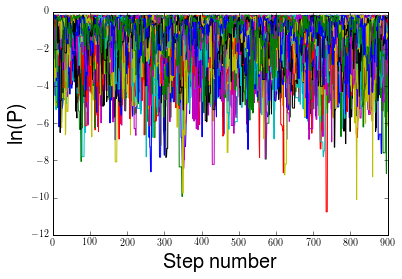

In [180]:
#plot of ln(p) vs. step number 
plt.figure(3)
[plt.plot(sampler.lnprobability[i,100:]) for i in range(100)]
plt.xlabel(r'Step number', fontsize = text_size)
plt.ylabel(r'ln(P)', fontsize = text_size)
plt.savefig("lnp_step_emcee_prob3.png", dpi=300)
plt.show()

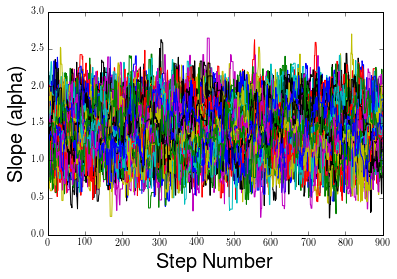

In [181]:
#slope (alpha) vs. Step Number
plt.figure(4)
[plt.plot(sampler.chain[i,100:,0]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'Slope (alpha)', fontsize = text_size)
plt.savefig("m_step_emcee_prob3.png", dpi=300)

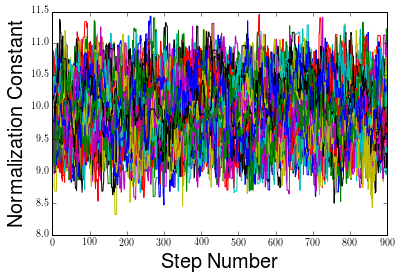

In [182]:
# normalization constant vs. Step Number
plt.figure(5)
[plt.plot(sampler.chain[i,100:,1]) for i in range(100)]
plt.xlabel(r'Step Number', fontsize = text_size)
plt.ylabel(r'Normalization Constant', fontsize = text_size)
plt.savefig("const_step_emcee_prob3.png", dpi=300)

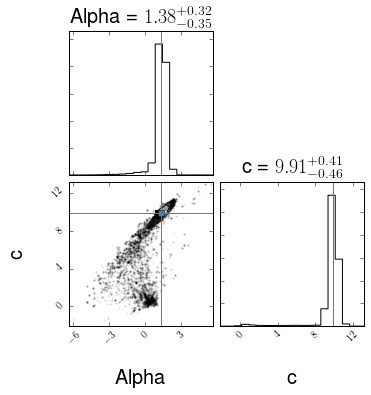

In [199]:
corner_plot = corner.corner(sampler.flatchain[100:,:], labels = ['Alpha','c'], show_titles = True,\
              plot_contours = True, truths = [1.35, 9.9],
                            label_kwargs={"fontsize": 20}, title_kwargs={"fontsize": 20})
corner_plot.show()
corner_plot.savefig("corner_plot_emcee_prob3.png", dpi=300)

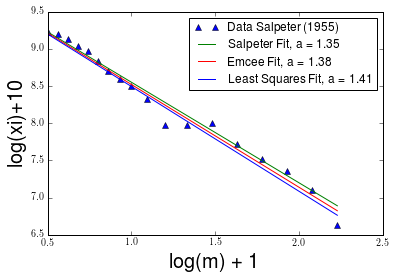

In [193]:
#plot the distribution from emcee
emcee_fit = []
for i in log_m:
    val = 9.9+(i*-1.38)
    emcee_fit.append(val)
#plot Salpeter's original fit
salpeter_fit = []
for i in log_m:
    val = 9.9+(i*-1.35)
    salpeter_fit.append(val)

#plot the comparison of each fit
plt.figure(6)
plt.plot(log_m, log_xi, "b^", label = 'Data Salpeter (1955)')
plt.plot(log_m, salpeter_fit, 'g-', label = 'Salpeter Fit, a = 1.35')
plt.plot(log_m, emcee_fit, 'r-', label = 'Emcee Fit, a = 1.38')
plt.plot(log_m, least_sq_fit, color = 'blue', label = 'Least Squares Fit, a = 1.41')
plt.xlabel(r'log(m) + 1', fontsize = text_size)
plt.ylabel(r'log(xi)+10', fontsize = text_size)
plt.legend()
plt.savefig("fit_comparison_power_law_prob3.png", dpi=300)
plt.show()